In [1]:
import underworld as uw
import glucifer
import numpy as np

In [10]:
annulus = uw.mesh._FeMesh_Annulus(elementRes=(20,100), radius=(3.0,6.), angularExtent=(0.0,360.0))
tField = uw.mesh.MeshVariable(annulus, nodeDofCount=1)


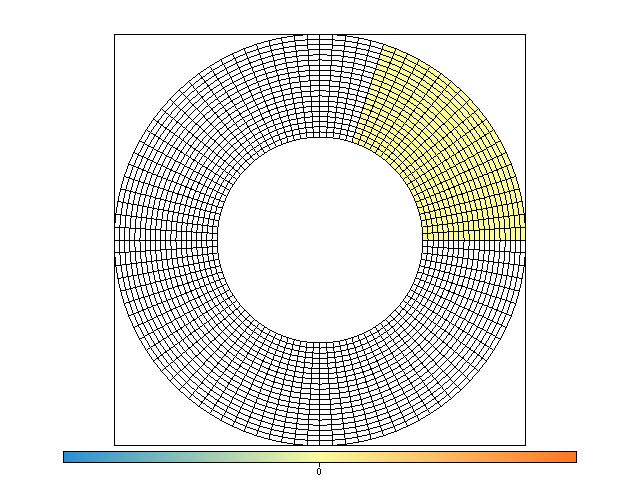

In [11]:
fig = glucifer.Figure()
fig.append(glucifer.objects.Mesh(annulus))
fig.append(glucifer.objects.Surface(annulus, tField, onMesh=True))
fig.show()


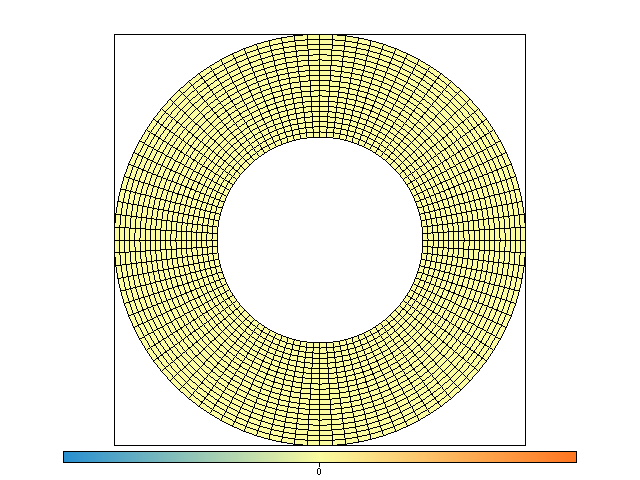

In [12]:
# fig.append(glucifer.objects.Mesh(annulus))
# fig.append(glucifer.objects.Surface(annulus, tField, onMesh=True))
fig.show()

In [6]:
outer = annulus.specialSets["MaxI_VertexSet"]
inner = annulus.specialSets["MinI_VertexSet"]

tField.data[inner.data] = 10.0
tField.data[outer.data] = 5.0

In [6]:
tBC = uw.conditions.DirichletCondition( variable=tField, indexSetsPerDof=(inner+outer))

In [7]:
ssSLE = uw.systems.SteadyStateHeat(tField,fn_diffusivity=1.0, conditions=tBC)

In [8]:
ssSolver = uw.systems.Solver(ssSLE)

In [9]:
ssSolver.solve()


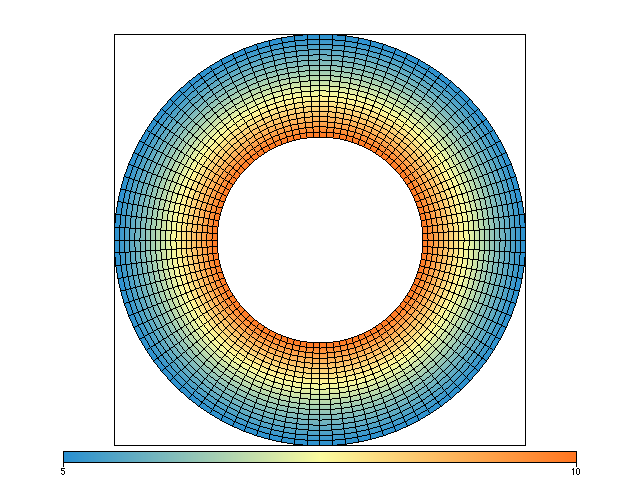

In [12]:
fig.show()